<a href="https://colab.research.google.com/github/mare-a/EjercicioP3/blob/rama-cristian/Clase3_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv('/content/attacks.csv', encoding='latin1')

df = pd.DataFrame(data)

df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [142]:
#df['Sex']
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [154]:
#Limpieza de datos
df_clean=df.drop(['pdf', 'href formula','href','Unnamed: 22', 'Unnamed: 23','Investigator or Source'], axis=1,inplace=True)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df= df.rename(columns={
    "Sex ": "Sex"
})
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
def clean_sex(sex):
    if pd.isna(sex):
        return 'N/A'
    sex = str(sex).strip().upper()
    if sex in ['F', 'FEMALE']:
        return 'F'
    elif sex in ['M', 'MALE']:
        return 'M'
    else:
        return 'N/A'

df['Sex'] = df['Sex'].apply(clean_sex)
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11.0,Minor injury to left thigh,N,14h00 -15h00,NaN,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48.0,Injury to left lower leg from surfboard skeg,N,07h45,NaN,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",2018.06.04,2018.06.04,6299.0


In [32]:
#Descripciòn del dataset

df.describe()

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [130]:
#Ver el tipo de datos que componen el dataset para poder saber qué estadísticas se pueden obtener
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Case Number     8702 non-null   object 
 1   Date            6302 non-null   object 
 2   Year            6300 non-null   float64
 3   Type            6298 non-null   object 
 4   Country         6252 non-null   object 
 5   Area            5847 non-null   object 
 6   Location        5762 non-null   object 
 7   Activity        5758 non-null   object 
 8   Name            6092 non-null   object 
 9   Sex             5737 non-null   object 
 10  Age             3471 non-null   object 
 11  Injury          6274 non-null   object 
 12  Fatal (Y/N)     5763 non-null   object 
 13  Time            2948 non-null   object 
 14  Species         3464 non-null   object 
 15  Case Number.1   6302 non-null   object 
 16  Case Number.2   6302 non-null   object 
 17  original order  6309 non-null  

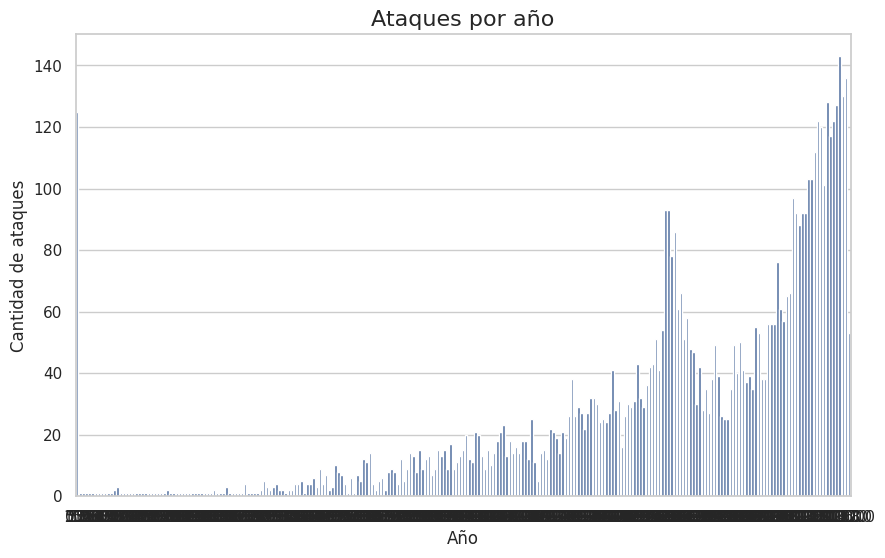

In [146]:
#sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x="Year", data=df)
plt.title("Ataques por año", fontsize=16)
plt.xlabel("Año")
plt.ylabel("Cantidad de ataques")
plt.show()

Una vez que hemos obtenido una estadìstica de la cantidad de ataques por año, podemos a partir de eso empezar a realizar nuestros análisis.

In [155]:
attacks_per_year = df.groupby(["Year", "Sex"])[['Fatal (Y/N)']].count()

In [148]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

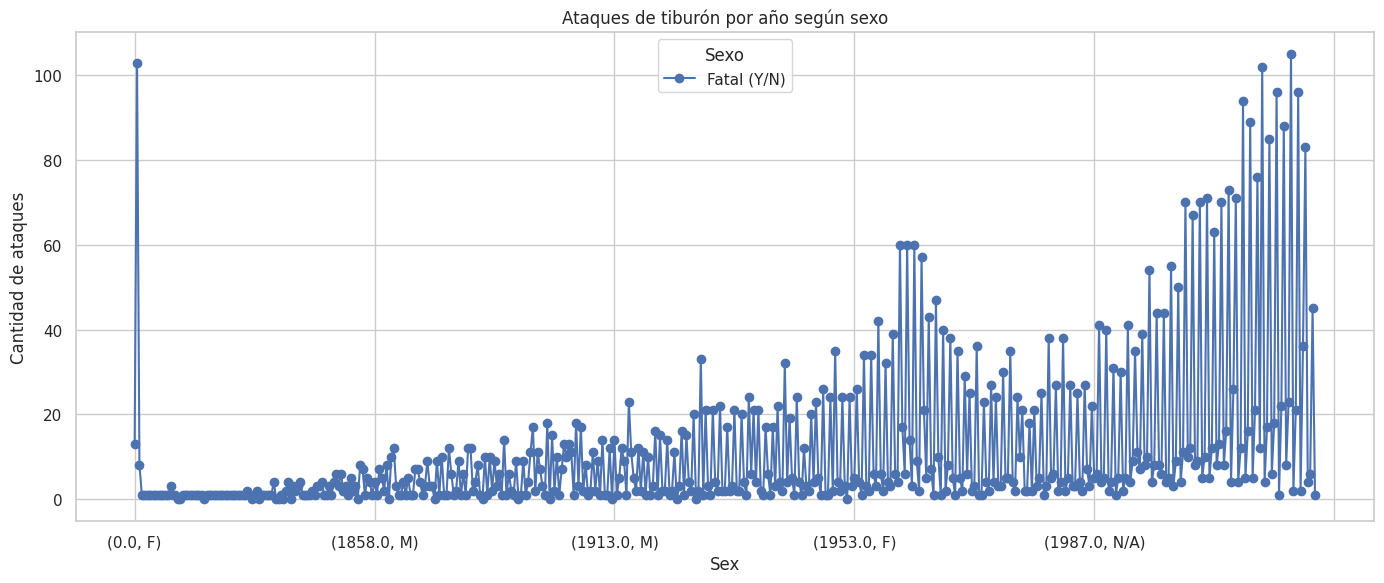

In [156]:
attacks_per_year.plot(figsize=(14, 6), marker='o')
plt.title("Ataques de tiburón por año según sexo")
plt.xlabel("Sex")
plt.ylabel("Cantidad de ataques")
plt.grid(True)
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()

/tmp/ipython-input-2698486998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Sex", y="Age", split=True, palette="muted")


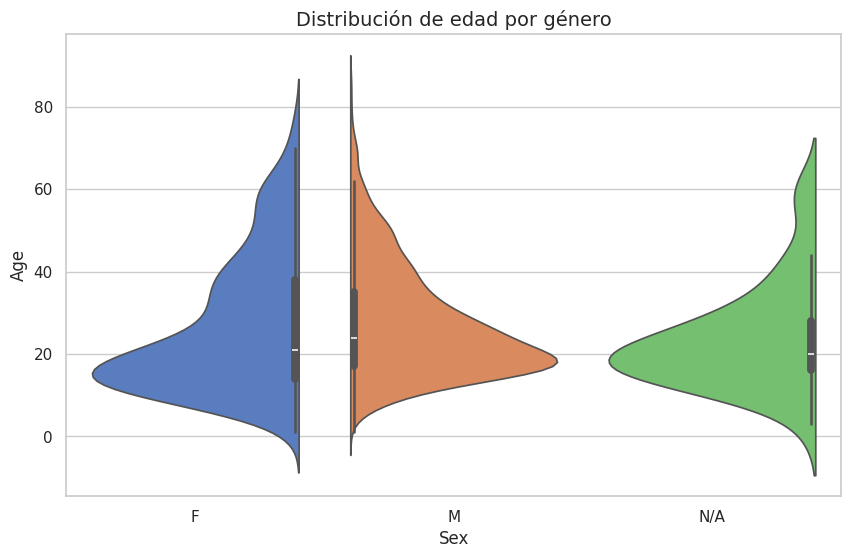

In [158]:
#Causas más comunes, según la playa
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Sex", y="Age", split=True, palette="muted")
plt.title("Distribución de edad por género", fontsize=14)
plt.show()


/tmp/ipython-input-4140791650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Type", y="Age", palette="Set2")


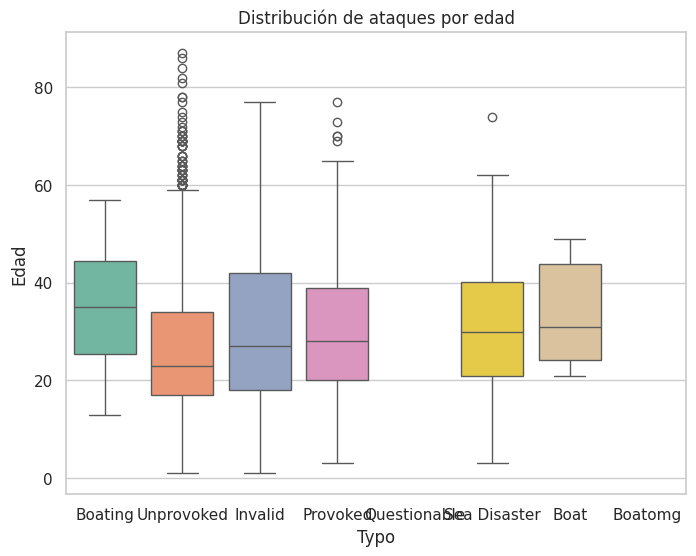

In [159]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Type", y="Age", palette="Set2")
plt.title("Distribución de ataques por edad")
plt.xlabel("Typo")
plt.ylabel("Edad")
plt.show()